TASK 1 : DESCRIPTIVE DATA

1.1 Manual Calculations

In [160]:
# Data
test_scores = [55,92,78,60,85,78,90,66,73,88]

In [161]:
# Mean

sum_of_values = 0
for value in test_scores:
    sum_of_values += value # Sum of Values
N = len(test_scores) # Number of Values
mean = sum_of_values / N # Mean Calculations
print(f"Mean: {mean}")

Mean: 76.5


In [162]:
# Median

sorted_scores = sorted(test_scores) # Sorting Data
middle = N//2 # Identifying Middle Value
median = sorted_scores[middle] # Median Calculation
print(f"Median: {median}")

Median: 78


In [163]:
# Mode

count_dict = {}
for x in test_scores:
    if x in count_dict:
        count_dict[x] += 1
    else:
        count_dict[x] = 1

max_count = 0
for x in count_dict:
    if count_dict[x] > max_count:
        max_count = count_dict[x]
        mode_value = x
max_count, mode_value

(2, 78)

In [164]:
# Range

min_score = test_scores[0]
max_score = test_scores[0]

for score in test_scores:
    if score < min_score: # Finding Minimum
        min_score = score
    if score > max_score:
        max_score = score # Finding Maximum

range_of_scores = max_score - min_score # Range Calculation

print("Minimum score", min_score)
print("Maximum score", max_score)
print("Range of test scores", range_of_scores)

Minimum score 55
Maximum score 92
Range of test scores 37


In [165]:
# Varience

squared_differences = []
for score in test_scores:
    diff = score - mean # Calculation of diffrence between scores and Mean
    squared = diff ** 2 # Squaring the difference
    squared_differences.append(squared)

print("Squared Differences:", squared_differences) # Listing Square Differences

# Sum of Squared Differences
sum_squared_diff = 0
for val in squared_differences:
    sum_squared_diff += val
print("Sum of Squared Differences:", sum_squared_diff)

# Calculating Varience
variance = sum_squared_diff/N
print(f"Variance: {variance}")

Squared Differences: [462.25, 240.25, 2.25, 272.25, 72.25, 2.25, 182.25, 110.25, 12.25, 132.25]
Sum of Squared Differences: 1488.5
Variance: 148.85


In [166]:
# Standard Deviation

standard_deviation = variance ** 0.5 # Taking Square Root of Variance
print(f"Standard Deviation: {standard_deviation}")

Standard Deviation: 12.200409829181968


1.2 Using Numpy

In [167]:
import numpy as np
from scipy import stats

# Mean
mean = np.mean(test_scores)
print(f"Mean: {mean}")

# Median
median = np.median(test_scores)
print(f"Median: {median}")

# Mode
mode = stats.mode(test_scores, keepdims=True)
print(f"Mode: {mode.mode[0]} (Count: {mode.count[0]})")

# Range
range_val = np.max(test_scores) - np.min(test_scores) # maximum - minimum
print(f"Range: {range_val}")

# Varience
variance = np.var(test_scores)
print(f"Variance: {variance}")

# Standard Deviation
std_dev = np.std(test_scores)
print(f"Standard Deviation: {std_dev}")

Mean: 76.5
Median: 78.0
Mode: 78 (Count: 2)
Range: 37
Variance: 148.85
Standard Deviation: 12.200409829181968


TASK 2 : SUPERVISED LEARNING - LINEAR REGRESSION

In [168]:
# Data
x_experience = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1) 
y_salary = np.array([45, 50, 60, 65, 75, 80, 90, 95])

2.1 Manual "Guess" and MSE Calculation

In [169]:
m = 7 # Guessed Slope
c = 40 # Guessed Intercept

# Gussed Line Equation
y_predicted = m * x_experience + c
print("y_predicted:\n", y_predicted)

# MSE Calculation
y_predicted = y_predicted.flatten()
squared_errors = (y_salary - y_predicted) **2
print("Squared Errors", squared_errors)
mse = np.mean(squared_errors)
print("Mean Squared error (MSE)", mse)

y_predicted:
 [[47]
 [54]
 [61]
 [68]
 [75]
 [82]
 [89]
 [96]]
Squared Errors [ 4 16  1  9  0  4  1  1]
Mean Squared error (MSE) 4.5


2.2 Using Scikit-Learn

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model fitting
model = LinearRegression()
model.fit(x_experience, y_salary)

# Predicting salaries using the fitted model
y_pred = model.predict(x_experience)

# Calculating MSE
print("Y_Prediction:", y_pred)
mse_sk= mean_squared_error(y_salary, y_pred)
print("Mean Squared error (MSE)", mse_sk)

# Calculating R-Squared
r2 = r2_score(y_salary, y_pred)
print("R-Squared:", r2)

# Printing the learned coefficients i.e. slope(m) and intercept(c)
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Y_Prediction: [44.16666667 51.54761905 58.92857143 66.30952381 73.69047619 81.07142857
 88.45238095 95.83333333]
Mean Squared error (MSE) 1.4880952380952395
R-Squared: 0.994824016563147
Slope (m): 7.380952380952383
Intercept (c): 36.78571428571428


# Interpret:

• What do the learned m and c tell you about the relationship between experience and salary in this model?
    - The slope (m=7.38..) means that for every extra year of experience, the predicted salary increases by approximately 7.38..K rs (if we consider salary in thousands). And the intercept (c = 36.785..) means that a person with no experience (i.e. 0 years of experience) is prdicted to earn 36.785..k rs. (again considering salary in thousands)

• What does your calculated MSE tell you about the model’s predictions for this dataset?
    - MSE is the average squared difference betwen actual salaries and the predicted ones, and in this case it is 1.49 which is very low and it means that this model"s prediction are very close to the actual data points. Also it means more accuracy in prediction.

• What does your calculated R2 score tell you about how well the model fits this dataset?
    - R^2 (R-squared) tells how much is the variation in salary is explained by years of experience. In this casee the value is 0.9948... and it means that 99.48...% of the variation in the salary is explained by experienc in this model, and only approx 0.52% of variation in salary is left unexplained.

TASK : 3 SUPERVISED LEARNING - LOGISTIC REGRESSION

In [171]:
# Given data
x_prep_hour = np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]).reshape(-1,1)
y_pass_fail = np.array([0,0,0,0,1,0,1,1,1,1])

3.1 Manual Sigmoid calculation and Prediction

In [172]:
# Guessed Parameters
m = 2
c = -5

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + (2.71828 ** (-z)))  # Approximate value of e

z_values = []
probabilities = []
predicted_classes = []

for x in x_prep_hour:
    z = m * x + c # Linear Combination
    z_values.append(z)
    
    prob = sigmoid(z) # Sigmoid Value
    probabilities.append(prob)

# Predicting Class
    pred = 1 if prob >= 0.5 else 0
    predicted_classes.append(pred)

# Calculating accuracy
correct = 0
for i in range(len(y_pass_fail)):
    if predicted_classes[i] == y_pass_fail[i]:
        correct += 1

accuracy = correct / len(y_pass_fail)

# Display results
print("Z values:", z_values)
print("Predicted probabilities:", probabilities)
print("Predicted classes:", predicted_classes)
print("Actual classes:", y_pass_fail)
print("Accuracy:", accuracy)


Z values: [array([-4.]), array([-3.]), array([-2.]), array([-1.]), array([0.]), array([1.]), array([2.]), array([3.]), array([4.]), array([5.])]
Predicted probabilities: [array([0.01798626]), array([0.04742596]), array([0.11920306]), array([0.26894155]), array([0.5]), array([0.73105845]), array([0.88079694]), array([0.95257404]), array([0.98201374]), array([0.99330713])]
Predicted classes: [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
Actual classes: [0 0 0 0 1 0 1 1 1 1]
Accuracy: 0.9


3.2 Using Scikit-Learn

In [173]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Model
model = LogisticRegression()
model.fit(x_prep_hour, y_pass_fail)

# Predictions
y_pred = model.predict(x_prep_hour)
print("Y Prediction:", y_pred)

# Coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Accuracy
acc = accuracy_score(y_pass_fail, y_pred)
print("Accuracy of the Modeel:", acc)

# Probabilities
y_pred_prob = model.predict_proba(x_prep_hour)
print("Y Prediction Probability", y_pred_prob)

# Confusion Matrix
conf_matrix = confusion_matrix(y_pass_fail, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Y Prediction: [0 0 0 0 0 1 1 1 1 1]
Coefficients: [[1.22396473]]
Intercept: [-3.36638058]
Accuracy of the Modeel: 0.8
Y Prediction Probability [[0.94016126 0.05983874]
 [0.89495794 0.10504206]
 [0.82206973 0.17793027]
 [0.71472641 0.28527359]
 [0.57602309 0.42397691]
 [0.42421019 0.57578981]
 [0.28546838 0.71453162]
 [0.17807002 0.82192998]
 [0.10513189 0.89486811]
 [0.05989249 0.94010751]]
Confusion Matrix:
[[4 1]
 [1 4]]


# Interpret:

• What does the accuracy score tell you about this model on this dataset?
    - The accuracy score tell the proportion of predictions made by the model,that are found to be correct. which is in this case is 0.8 means 8 out of 10 students prediction made by the model are found out to be correct but 2 are found to be wrong,
    
• Explain what each part of your confusion matrix (True Positives, True Negatives, False Positives, False Negatives) represents in the context of predicting pass/fail.
    - in this datasetr we are predicting whwther a student passes(1) or fails(0) based on the number of hours they studied. The cofusion matrix divided it into 4 parts
        - TRUE POSITIVES - these are the students who actually passes and also predicted to be passed by the model. TP shows successful predictions of student who did well.
        - TRUE NEGATIVES (TN) - these are the students who actually filed and also predicted to be ailed by the model. TN shows successful predictions of students who are at risk due to less hours of studying.
        - FALSE POSITIVES (FP) - these are the students who actually failed but were incorrectlly predicted to be pass. In this case the model was overly optimistica and it wrongly assumed these student to be pssed,
        - FALSE NEGATIVES (FN) - these are the students who actually passed but were predicted by the model to be fail. The model underestimated these students despite them putting in enough efforts.


TASK 4 : UNSUPERVISED LEARNING - K-MEANS CLUSTERING.

In [174]:
# Given Data
X_cluster_data = np.array([
    [2, 10],  # Point 0
    [2, 5],   # Point 1
    [8, 4],   # Point 2
    [5, 8],   # Point 3
    [7, 5],   # Point 4
    [6, 4],   # Point 5
    [1, 2],   # Point 6
    [4, 9]    # Point 7
])

4.1 Manual K-Mean Iterations.

In [175]:
# Initialize centroids
C1 = X_cluster_data[0]  # [2, 10]
C2 = X_cluster_data[1]  # [2, 5]

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Iteration 1
clusters = {0: [], 1: []}
for i, point in enumerate(X_cluster_data):
    d_c1 = euclidean_distance(point, C1)
    d_c2 = euclidean_distance(point, C2)
    if d_c1 < d_c2:
        clusters[0].append(i)  # Cluster 1
        print(f"Point {i} -> Cluster 1 (Distance: C1={d_c1:.2f}, C2={d_c2:.2f})")
    else:
        clusters[1].append(i)  # Cluster 2
        print(f"Point {i} -> Cluster 2 (Distance: C1={d_c1:.2f}, C2={d_c2:.2f})")

# Update Step
new_C1 = np.mean(X_cluster_data[clusters[0]], axis=0)
new_C2 = np.mean(X_cluster_data[clusters[1]], axis=0)

print("\nNew Centroids after Iteration 1:")
print("New C1:", new_C1)
print("New C2:", new_C2)

# Iteration 2
print("\nIteration 2 - Assignment Step:")
clusters = {0: [], 1: []}
for i, point in enumerate(X_cluster_data):
    d_c1 = euclidean_distance(point, new_C1)
    d_c2 = euclidean_distance(point, new_C2)
    if d_c1 < d_c2:
        clusters[0].append(i)
        print(f"Point {i} -> Cluster 1 (Distance: C1={d_c1:.2f}, C2={d_c2:.2f})")
    else:
        clusters[1].append(i)
        print(f"Point {i} -> Cluster 2 (Distance: C1={d_c1:.2f}, C2={d_c2:.2f})")


Point 0 -> Cluster 1 (Distance: C1=0.00, C2=5.00)
Point 1 -> Cluster 2 (Distance: C1=5.00, C2=0.00)
Point 2 -> Cluster 2 (Distance: C1=8.49, C2=6.08)
Point 3 -> Cluster 1 (Distance: C1=3.61, C2=4.24)
Point 4 -> Cluster 2 (Distance: C1=7.07, C2=5.00)
Point 5 -> Cluster 2 (Distance: C1=7.21, C2=4.12)
Point 6 -> Cluster 2 (Distance: C1=8.06, C2=3.16)
Point 7 -> Cluster 1 (Distance: C1=2.24, C2=4.47)

New Centroids after Iteration 1:
New C1: [3.66666667 9.        ]
New C2: [4.8 4. ]

Iteration 2 - Assignment Step:
Point 0 -> Cluster 1 (Distance: C1=1.94, C2=6.62)
Point 1 -> Cluster 2 (Distance: C1=4.33, C2=2.97)
Point 2 -> Cluster 2 (Distance: C1=6.62, C2=3.20)
Point 3 -> Cluster 1 (Distance: C1=1.67, C2=4.00)
Point 4 -> Cluster 2 (Distance: C1=5.21, C2=2.42)
Point 5 -> Cluster 2 (Distance: C1=5.52, C2=1.20)
Point 6 -> Cluster 2 (Distance: C1=7.49, C2=4.29)
Point 7 -> Cluster 1 (Distance: C1=0.33, C2=5.06)


4.2 Using Scikit-learn

Final cluster centroids from scikit-learn:
[[5.5  3.75]
 [3.25 8.  ]]
Labels shape: (8,)
First 5 labels: [1 1 0 1 0]


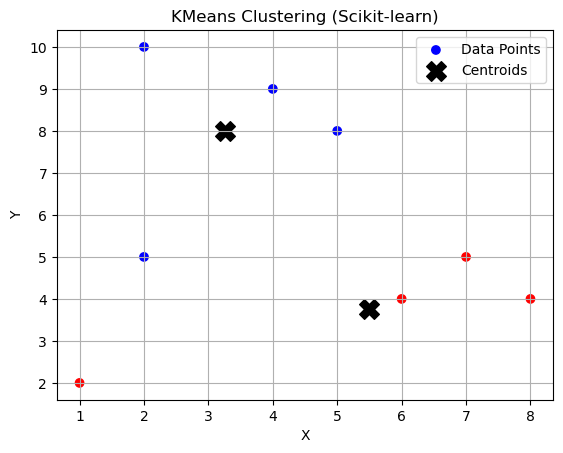

In [176]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying KMeans from sklearn
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_cluster_data)

# Output centroids
print("Final cluster centroids from scikit-learn:")
print(kmeans.cluster_centers_)

# Output cluster labels
labels = kmeans.labels_
print(f"Labels shape: {labels.shape}")
print(f"First 5 labels: {labels[:5]}")

# Plotting
colors = ['red' if label == 0 else 'blue' for label in kmeans.labels_]
plt.scatter(X_cluster_data[:, 0], X_cluster_data[:, 1], c=colors, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering (Scikit-learn)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


# Compare: How do the final centroids and labels from Scikit-learn compare to your manual Iteration 1 (or 2) results? Are they similar? Why might they differ?
    - Manual KMeans (Iteration 2):
        - Centroids after iteration 1:
            - C1 ≈ [3.67, 9.0]
            - C2 ≈ [4.8, 4.0]
        - Cluster labels:
            - Points 0, 3, 7 → Cluster 1
            - Points 1, 2, 4, 5, 6 → Cluster 2

    - Scikit-learn KMeans Results:
        - Final centroids:
            - [5.5, 3.75]
            - [3.25, 8.0]
        - Cluster labels:
            - Points 0, 1, 3, 7 → Cluster 1
            - Points 2, 4, 5, 6 → Cluster 0

    - Comparision : There are two meaningful cluster in both the methods, but centroids are slightly different. Also Cluster assignments are mostly consistent, except Point 1 (In manual:Cluster-2, In sklearn:Cluster-1). This may be due to centroids shifting during sklearn's full optimization.
    
    - The reasons behind all these diffrences can be because :-
        - Scikit-learn uses multiple iterations, optimization, and sometimes more initializations.
        - Manual method is an approximation with fewer steps.
        - Real clustering often requires many iterations to find stable and accurate centroids.